In [57]:
#handwriting data
#(MNIST data collection): http://yann.lecun.com/exdb/mnist/
#http://pjreddie.com/pjects/mnist-in-csv/
####2 csv files:

#http://www.pjreddie.com/media/files/mnist_train.csv
####training set: 60,000 data with labels (inputs and outputs)
#to be used in network learning

#http://www.pjreddie.com/media/files/mnist_test.csv
####test data: 10,000 data to see whether the algorithm works well

#multiple rows
# the number at the front is the number that the image represents
# the rest of the numbers are pixel values (there are 784 values since the size of the pixel arrangement is 784(28*28))

#subset of MNIST data:
#100 records: http://git.io/vySZ1
#10 records: https://git.io/vySZP

data_file = open("mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()
#read-only version
#readline() reads every line to create data_list
###each row becomes an element of the list (data_list[9] is the 10th record)

In [58]:
print(len(data_list))
data_list[0]

#the label is 5. The other 784 numbers represent the colour values that constitute the image (between 0-255)

100


'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

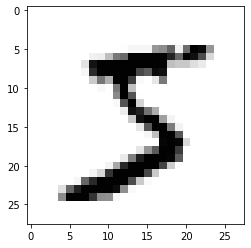

In [59]:
#visualising what rows represent
#convert it into a matrix
import numpy
import matplotlib.pyplot
%matplotlib inline
all_values=data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
#take all numbers (784) from 'all_values' except the first number
#numpy.asfarray converts strings to floats and create a matrix (28*28)
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation='None')
#visualise - grey colour used

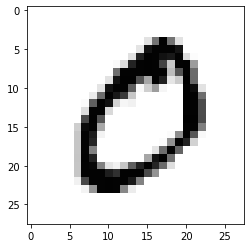

In [60]:
all_values=data_list[1].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation='None')

In [61]:
##prepare data
#1) the values need to be in the range the activation function is able to process
#####(0-255) to (0.01-1.0)
#Divide (0-255) by 255. --(0-1)
#Multiply it by 0.99. --(0-0.99)
#Add 0.01 -- (0.01-1.00)
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [62]:
#2) the output would converge to 0 and 1 but cannot be equal to or higher/lower than 0 and 1
##What we want for the algorithm to produce:
    #if we want them to produce the image: we need 784 output nodes
    #we actually want them to categorise images and allocate the correct label (the number 0-9)
    #one of the output nodes will have the highest value
onodes = 10 #output nodes is 10 since we have 10 labels
targets = numpy.zeros(onodes) + 0.01 #to create a matrix filled with 0 (0.01 to avoid 0)
targets[int(all_values[0])]=0.99
    #the first element is the outcome of learning  - string to integer
    #the value of output element is 0.99
print(targets)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [63]:
import numpy
import scipy.special #to use the sigmoid function expit()
import matplotlib.pyplot #to visualise the matrix
%matplotlib inline
#to visualise it in this notebook, not in external window

class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        self.lr=learningrate
        self.activation_function=lambda x: scipy.special.expit(x)
        pass
    def train(self, inputs_list, targets_list):
        #change lists into 2D arrays
        inputs=numpy.array(inputs_list, ndmin=2).T
        targets=numpy.array(targets_list, ndmin=2).T
        hidden_inputs=numpy.dot(self.wih, inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        final_inputs=numpy.dot(self.who, hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        #errors in final layer
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        self.who += self.lr * numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))
        pass
    def query(self, inputs_list):
        inputs=numpy.array(inputs_list, ndmin=2).T
        hidden_inputs=numpy.dot(self.wih, inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        final_inputs=numpy.dot(self.who, hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        return final_outputs

input_nodes=784
#neural network finds patterns in input values by choosing numbers that are smaller than input values
hidden_nodes=100
output_nodes=10
learning_rate=0.3
n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
training_data_file=open("mnist_train_100.csv", 'r')
training_data_list=training_data_file.readlines()
training_data_file.close()

    #neuralnetwork learning
for record in training_data_list:
        #separate record by ,
    all_values=record.split(',')
        #adjust range of input values
    inputs=(numpy.asfarray(all_values[1:]) / 255.0 * 0.99)+0.01
        #create output value lists (all are 0.01 except the actual output)
    targets=numpy.zeros(output_nodes)+0.01
        #all_values[0] is the output value of this record
    targets[int(all_values[0])]=0.99
    n.train(inputs, targets)
    pass

In [64]:
#load the mnist test data CSV file into a list
test_data_file=open("mnist_test_10.csv", 'r')
test_data_list=test_data_file.readlines()
test_data_file.close()

7


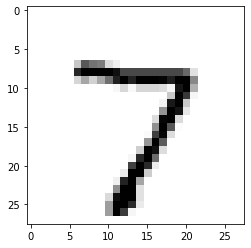

In [65]:
all_values=test_data_list[0].split(',')
print(all_values[0])
image_array=numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [66]:
n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)
#8th element (corresponds to 7) has the highest value
#works well!
#learned with 100 data - but works well

array([[0.03693238],
       [0.00976275],
       [0.01593213],
       [0.07044529],
       [0.06518907],
       [0.02737849],
       [0.00520738],
       [0.72199455],
       [0.06132553],
       [0.03704517]])

testing the performance

In [68]:
#the scorecard - test the performance of the network
scorecard=[]
for record in test_data_list:
    all_values=record.split(',')
    correct_label=int(all_values[0])
    print("correct label: ", correct_label)
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99)+0.01
    outputs=n.query(inputs)
    label=numpy.argmax(outputs) #the index of the highest value is the label
    print("network's answer: ", label)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

#update the scoreboard for each record in the data list

correct label:  7
network's answer:  7
correct label:  2
network's answer:  6
correct label:  1
network's answer:  1
correct label:  0
network's answer:  0
correct label:  4
network's answer:  4
correct label:  1
network's answer:  1
correct label:  4
network's answer:  4
correct label:  9
network's answer:  3
correct label:  5
network's answer:  8
correct label:  9
network's answer:  7


In [69]:
print(scorecard )

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [71]:
#calcualte the performance score, the fraction of correct answers
scorecard_array=numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.6


training and testing using the whole data

In [74]:
input_nodes=784
hidden_nodes=100
output_nodes=10
learning_rate=0.3
n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
training_data_file=open("mnist_train.csv", 'r')
training_data_list=training_data_file.readlines()
training_data_file.close()
    #neuralnetwork learning
for record in training_data_list:
    all_values=record.split(',')
    inputs=(numpy.asfarray(all_values[1:]) / 255.0 * 0.99)+0.01
    targets=numpy.zeros(output_nodes)+0.01
    targets[int(all_values[0])]=0.99
    n.train(inputs, targets)
    pass

In [81]:
#load the mnist test data CSV file into a list
test_data_file=open("mnist_test.csv", 'r')
test_data_list=test_data_file.readlines()
test_data_file.close()

all_values=test_data_list[0].split(',')
print(all_values[0])

7


In [82]:
n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([[0.00110669],
       [0.01092275],
       [0.01072548],
       [0.02133235],
       [0.00191071],
       [0.01949687],
       [0.00134471],
       [0.99641277],
       [0.00107449],
       [0.01011604]])

In [83]:
scorecard=[]
for record in test_data_list:
    all_values=record.split(',')
    correct_label=int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99)+0.01
    outputs=n.query(inputs)
    label=numpy.argmax(outputs) #the index of the highest value is the label
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [84]:
scorecard_array=numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)
#0.9451

performance =  0.9451


ways to improve